<a href="https://colab.research.google.com/github/Ari-Net/ISPPR-2/blob/master/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, Flatten, Input
from tensorflow.keras import Model, Sequential

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train = datagen.flow_from_directory('/content/drive/MyDrive/dataset', class_mode='categorical', batch_size=16, target_size=(64, 64),
                                    color_mode='grayscale', subset='training')

validation = datagen.flow_from_directory('/content/drive/MyDrive/dataset', class_mode='categorical', batch_size=16, target_size=(64, 64),
                                          color_mode='grayscale', subset='validation')

Found 1168 images belonging to 73 classes.
Found 292 images belonging to 73 classes.


# Модель з єдиним вихідним шаром

In [15]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(73, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_1.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_1', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 73)                299081    
Total params: 299,081
Trainable params: 299,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 316s - loss: 6.3934 - AUC: 0.4979 - Accuracy: 0.0086 - val_loss: 6.0126 - val_AUC: 0.5206 - val_Accuracy: 0.0274
Epoch 2/200
73/73 - 2s - loss: 6.0924 - AUC: 0.5499 - Accuracy: 0.0103 - val_loss: 6.0146 - val_AUC: 0.5543 - val_Accuracy: 0.0308
Epoch 3/200
73/73 - 2s - loss: 5.9703 - AUC: 0.5956 - Accuracy: 0.0283 - val_loss: 5.5820 - val_AUC: 0.5857 - val_Accuracy: 0.0377
Epoch 4/200
73/73 - 2s - loss: 5.3402 - AUC: 0.6484 - Accuracy: 0.0462 - val_loss: 5.5840 - val_AUC: 0.5944 - val_Acc

# Глибока модель з двома шарами ReLU

In [16]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu'))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='relu'))
model.add(Dense(73, kernel_initializer=tf.keras.initializers.RandomNormal(), activation='softmax'))
model.summary()

model.compile(optimizer='sgd', 
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_2.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_2', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 4.3283 - AUC: 0.4854 - Accuracy: 0.0146 - val_loss: 4.2840 - val_AUC: 0.5069 - val_Accuracy: 0.0171
Epoch 2/200
73/73 - 2s - loss: 4.2887 - AUC: 0.5057 - Accuracy: 0.0188 - val_loss: 4.2790 - val_AUC: 0.5175 - val_A

# Ініціалізація ваг методом He та використання оптимізатора Adam

In [17]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_3.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_3', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_5 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_6 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 7.7402 - AUC: 0.5009 - Accuracy: 0.0111 - val_loss: 4.2916 - val_AUC: 0.5000 - val_Accuracy: 0.0137
Epoch 2/200
73/73 - 2s - loss: 4.2985 - AUC: 0.4968 - Accuracy: 0.0103 - val_loss: 4.2912 - val_AUC: 0.5000 - val_A

# Навчання не відбувається через проблему "помираючого ReLU". Застосуємо функцію активації LeakyReLU

In [18]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),  activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.01), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_3.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_3', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_8 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_9 (Dense)              (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 13.4900 - AUC: 0.4902 - Accuracy: 0.0171 - val_loss: 5.1186 - val_AUC: 0.5136 - val_Accuracy: 0.0171
Epoch 2/200
73/73 - 2s - loss: 4.7033 - AUC: 0.4879 - Accuracy: 0.0163 - val_loss: 4.5532 - val_AUC: 0.5035 - val_

# Використаємо менший коефіцієнт навчання

In [19]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),  activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_4.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_4', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_11 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_12 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 4.5621 - AUC: 0.4877 - Accuracy: 0.0103 - val_loss: 4.3214 - val_AUC: 0.5015 - val_Accuracy: 0.0205
Epoch 2/200
73/73 - 2s - loss: 4.3494 - AUC: 0.4977 - Accuracy: 0.0120 - val_loss: 4.3122 - val_AUC: 0.5095 - val_A

# Застосуємо L2 регуляризацію

In [20]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(),
                activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(),
                activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, kernel_regularizer=tf.keras.regularizers.l2(), activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_5.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_5', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_14 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_15 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
73/73 - 3s - loss: 5.3342 - AUC: 0.5014 - Accuracy: 0.0120 - val_loss: 4.9421 - val_AUC: 0.4984 - val_Accuracy: 0.0103
Epoch 2/200
73/73 - 2s - loss: 4.8756 - AUC: 0.5056 - Accuracy: 0.0163 - val_loss: 4.7999 - val_AUC: 0.5205 - val_A

# Застосуємо пакетну нормалізацію

In [21]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(BatchNormalization())
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(BatchNormalization())
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_6.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_6', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 4096)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 4096)              16384     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               524416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 96)                12384     
_________________________________________________________________
batch_normalization_2 (Batch (None, 96)                384       
_________________________________________________________________
dense_18 (Dense)             (None, 73)               

# Застосуємо Dropout

In [22]:
model = Sequential()
model.add(Input((64, 64, 1)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dropout(0.4))
model.add(Dense(96, kernel_initializer=tf.keras.initializers.HeNormal(), activation=tf.keras.layers.ReLU(negative_slope=0.05)))
model.add(Dense(73, activation='softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy', 
              metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.CategoricalAccuracy(name='Accuracy')])
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
             tf.keras.callbacks.ModelCheckpoint(filepath='model_7.h5'),
             tf.keras.callbacks.TensorBoard('./logs/model_7', update_freq=1)]             
model.fit(train, validation_data=validation, callbacks=callbacks, epochs=200, verbose=2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               524416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_21 (Dense)             (None, 73)                7081      
Total params: 543,881
Trainable params: 543,881
Non-trainable params: 0
________________________________________________

# Розпізнаємо нові зображення

In [41]:
import glob
import matplotlib.pyplot as plt
import numpy as np


model = tf.keras.models.load_model('model_7.h5', custom_objects={'ReLU': tf.keras.layers.ReLU()})

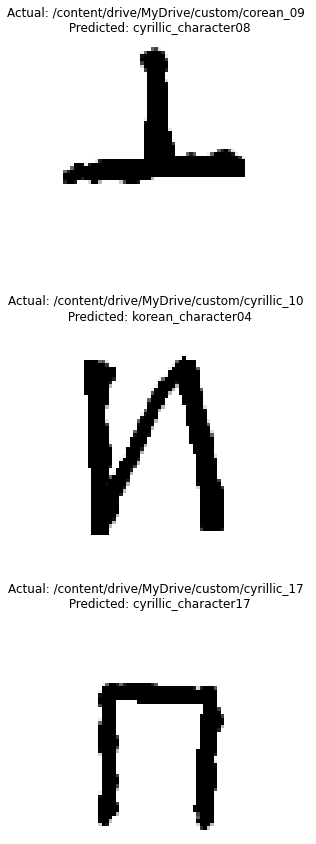

In [70]:
images = glob.glob('/content/drive/MyDrive/custom/*')
class_names = list(train.class_indices.keys())
fig, axes = plt.subplots(len(images), 1, figsize=(4,15))
for path, ax in zip(images, axes):
    image = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale', target_size=(64, 64))
    ax.imshow(image, cmap='gray')
    image_arr = tf.keras.preprocessing.image.img_to_array(image)
    image_arr /= 255.
    pred = model.predict(np.array([image_arr]))
    actual = path.split("\\")[-1][:-4]
    title = f'Actual: {actual} \n Predicted: {class_names[np.argmax(pred)]}'
    ax.set_title(title)
    ax.set_axis_off()